In [238]:
# Importing all library to use
# for later
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from pandas.plotting import scatter_matrix
%matplotlib inline

In [239]:
# Reading data from file to proess
# file is at same location where we have this python code sheet
# Using panda lib to read file

data = pd.read_csv("train.csv")
trainData = data.copy()

In [240]:
# Number of colums
# how many rows dataset have
# how mnay not-null value each column have
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [241]:
# first five rows to view
# change value from 5 to any number to view more data
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [242]:
#since above code is not displaying all the features
# so use below code to display all features
pd.set_option('display.max_columns', None)
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [243]:
# statistical info about the numerical features
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [244]:
#list the fueatures which have numerical values

LotFrontage
LotArea

YearBuilt
YearRemodAdd

MasVnrArea

BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF

1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
Kitchen: Kitchens above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Fireplaces: Number of fireplaces

GarageYrBlt: Year garage was built
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet

WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet


MiscVal: '$' Value of miscellaneous feature
MoSold: Month Sold (MM)
YrSold: Year Sold (YYYY)

SyntaxError: invalid syntax (<ipython-input-244-028159aff913>, line 16)

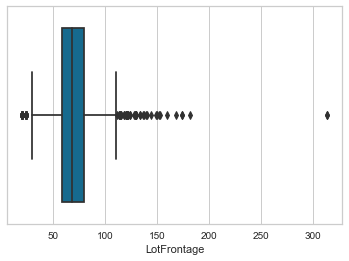

In [245]:
sns.boxplot(trainData['LotFrontage'])

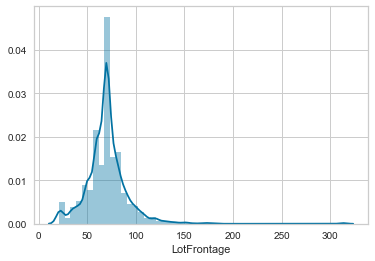

In [246]:
sns.distplot(trainData['LotFrontage'].fillna(70.05))

In [247]:
trainData['LotFrontage'].fillna(70.05, inplace=True)

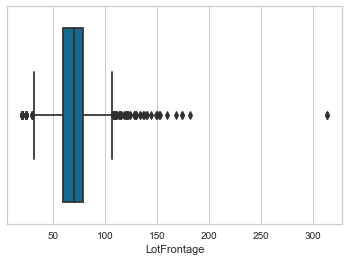

In [248]:
sns.boxplot(trainData['LotFrontage'])

In [249]:
trainData['LotFrontage'].sort_values()

227      21.0
1378     21.0
75       21.0
434      21.0
430      21.0
        ...  
197     174.0
231     174.0
1127    182.0
1298    313.0
934     313.0
Name: LotFrontage, Length: 1460, dtype: float64

In [250]:
df = pd.DataFrame(data)
df.iloc[[1298,934]]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000


In [251]:
trainData= trainData.drop([1298])
trainData = trainData.drop([934])

In [252]:
trainData.iloc[[1298]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1300,1301,60,RL,70.05,10762,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,225000


In [253]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1377.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.969822,56.920439,69.716701,10468.471879,6.096022,5.574760,1971.250343,1984.834705,103.279310,440.085734,46.613169,567.589163,1054.288066,1159.584362,346.816872,5.852538,1512.253772,0.423868,0.057613,1.564472,0.382716,2.865569,1.046639,6.512346,0.611111,1978.498184,1.766804,472.310014,94.227023,46.524005,21.984225,3.414266,15.081619,2.433471,43.548697,6.322359,2007.815501,180893.652949
std,421.601941,42.318471,20.114423,9879.455077,1.379962,1.112835,30.206855,20.642513,180.254984,435.587982,161.420729,442.033296,418.380493,374.876948,436.447494,48.655960,514.393652,0.517404,0.238907,0.551058,0.502871,0.815789,0.220483,1.618840,0.641988,24.689824,0.747778,212.511552,125.361232,65.977740,61.155666,29.337173,55.792877,38.209947,496.460799,2.699105,1.328989,79479.008386
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.250000,20.000000,60.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.250000,796.000000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000
50%,729.500000,50.000000,70.050000,9475.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,382.000000,0.000000,479.500000,991.500000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,479.500000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.750000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,165.750000,712.000000,0.000000,808.000000,1297.750000,1390.750000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


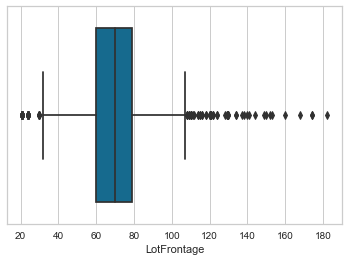

In [254]:
#LotFrontage post outlier removal
sns.boxplot(trainData['LotFrontage'])

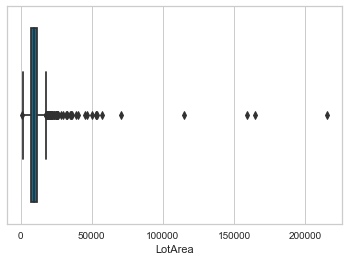

In [255]:
sns.boxplot(trainData['LotArea'])

In [256]:
trainData['LotArea'].sort_values()

956       1300
1039      1477
614       1491
489       1526
1038      1533
         ...  
451      70761
706     115149
249     159000
335     164660
313     215245
Name: LotArea, Length: 1458, dtype: int64

In [257]:
df.iloc[[706,249,335,313,451]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000


In [258]:
trainData= trainData.drop([706])
trainData = trainData.drop([249])
trainData = trainData.drop([335])
trainData = trainData.drop([313])

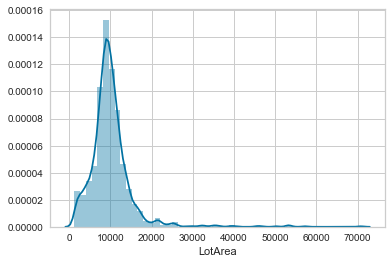

In [259]:
sns.distplot(trainData['LotArea'])

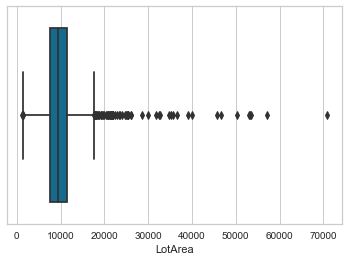

In [260]:
#post outlier removal
sns.boxplot(trainData['LotArea'])

In [261]:
# to know house ageing
# to know ageing from remodelling of house
trainData['YearBuilt'] = 2019-trainData['YearBuilt']
trainData['YearRemodAdd'] = 2019-trainData['YearRemodAdd']

In [262]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,43,43,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,18,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,104,49,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,19,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


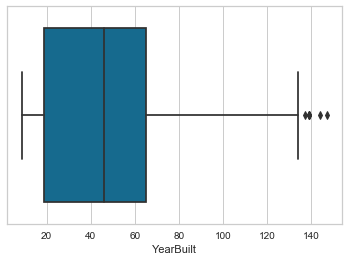

In [263]:
sns.boxplot(trainData['YearBuilt'])

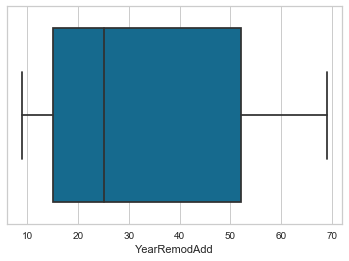

In [264]:
sns.boxplot(trainData['YearRemodAdd'])

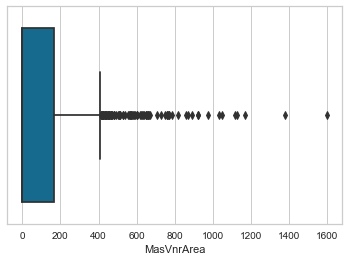

In [265]:
sns.boxplot(trainData['MasVnrArea'])

In [266]:
trainData['MasVnrArea'].sort_values()

729     0.0
845     0.0
847     0.0
848     0.0
852     0.0
       ... 
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrArea, Length: 1454, dtype: float64

In [267]:
trainData['MasVnrArea'] = trainData['MasVnrArea'].fillna(103.68)
trainData['MasVnrArea'].sort_values()

730        0.0
844        0.0
845        0.0
847        0.0
848        0.0
         ...  
70      1115.0
115     1129.0
691     1170.0
1169    1378.0
297     1600.0
Name: MasVnrArea, Length: 1454, dtype: float64

In [268]:
trainData['MasVnrArea'].fillna(103.68, inplace=True)

In [269]:
df.iloc[[297,1169]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [270]:
trainData= trainData.drop([297])
trainData = trainData.drop([1169])

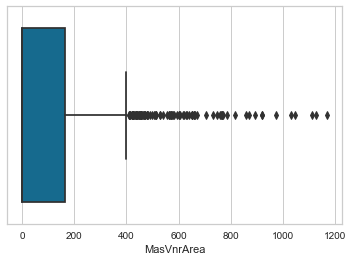

In [271]:
#post oulier removal
sns.boxplot(trainData['MasVnrArea'])

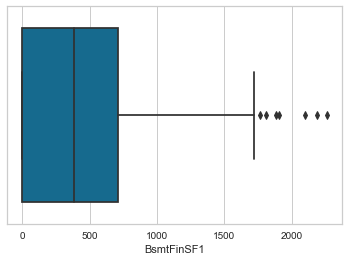

In [272]:
sns.boxplot(trainData['BsmtFinSF1'])

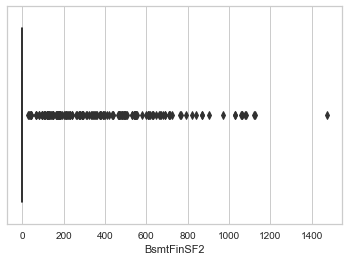

In [273]:
sns.boxplot(trainData['BsmtFinSF2'])

In [274]:
trainData['BsmtFinSF']=trainData['BsmtFinSF1']+trainData['BsmtFinSF2']

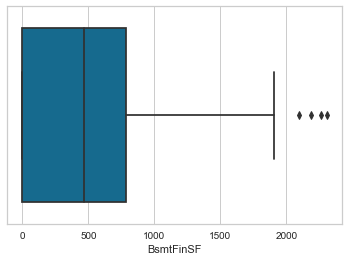

In [275]:
sns.boxplot(trainData['BsmtFinSF'])

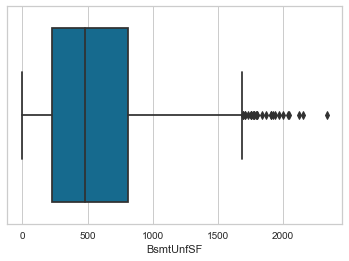

In [276]:
sns.boxplot(trainData['BsmtUnfSF'])

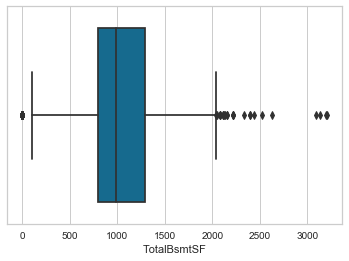

In [277]:
sns.boxplot(trainData['TotalBsmtSF'])

In [278]:
trainData['TotalBsmtSF'].sort_values()

532        0
778        0
553        0
1232       0
90         0
        ... 
1373    2633
440     3094
523     3138
496     3200
332     3206
Name: TotalBsmtSF, Length: 1452, dtype: int64

In [279]:
df.iloc[[332,496,523,440]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231,Unf,0,1969,3200,GasA,Ex,Y,SBrkr,3228,0,0,3228,1,0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1992.0,RFn,2,546,TA,TA,Y,264,75,291,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [280]:
trainData= trainData.drop([332])
trainData = trainData.drop([496])
trainData= trainData.drop([523])
trainData = trainData.drop([440])

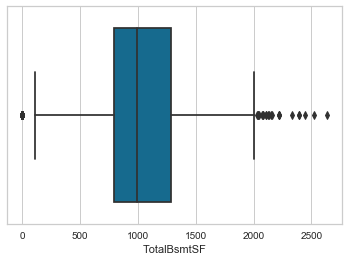

In [281]:
#post outlier removal
sns.boxplot(trainData['TotalBsmtSF'])

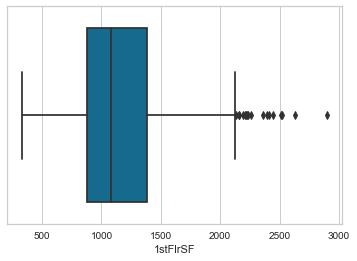

In [282]:
sns.boxplot(trainData['1stFlrSF'])

In [283]:
trainData['1stFlrSF'].sort_values()

533      334
705      372
1100     438
916      480
227      483
        ... 
691     2444
529     2515
1044    2524
1373    2633
1024    2898
Name: 1stFlrSF, Length: 1448, dtype: int64

In [284]:
df.iloc[[1024,1373]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1024,1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1976,1976,Hip,WdShake,Stone,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,ALQ,1165,LwQ,400,0,1565,GasA,TA,Y,SBrkr,2898,0,0,2898,1,0,2,0,2,1,Gd,10,Typ,1,Gd,Attchd,1976.0,Fin,2,665,TA,TA,Y,0,72,174,0,0,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml,287000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,Ex,Y,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500


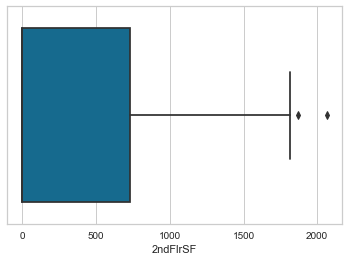

In [285]:
sns.boxplot(trainData['2ndFlrSF'])

In [286]:
trainData['2ndFlrSF'].sort_values()

1459       0
1323       0
738        0
1321       0
741        0
        ... 
769     1589
1360    1611
304     1818
691     1872
1182    2065
Name: 2ndFlrSF, Length: 1448, dtype: int64

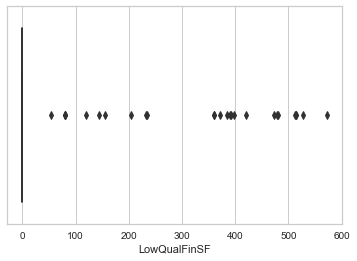

In [287]:
sns.boxplot(trainData['LowQualFinSF'])

In [288]:
trainData['LowQualFinSF'].value_counts()

0      1422
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

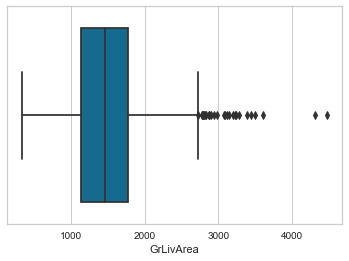

In [289]:
# GrLivArea= 1stFlrSF + 2ndFlrSF
sns.boxplot(trainData['GrLivArea'])

In [290]:
trainData['GrLivArea'].sort_values()

533      334
1100     438
916      480
29       520
528      605
        ... 
1268    3447
304     3493
185     3608
691     4316
1182    4476
Name: GrLivArea, Length: 1448, dtype: int64

In [291]:
df.iloc[[691,1182]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [292]:
trainData= trainData.drop([691])
trainData = trainData.drop([1182])

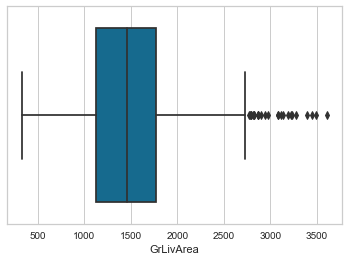

In [293]:
#post outlier removal
sns.boxplot(trainData['GrLivArea'])

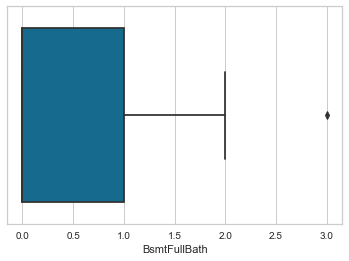

In [294]:
sns.boxplot(trainData['BsmtFullBath'])

In [295]:
trainData['BsmtFullBath'].sort_values()

732     0
652     0
653     0
655     0
1189    0
       ..
921     2
807     2
634     2
420     2
738     3
Name: BsmtFullBath, Length: 1446, dtype: int64

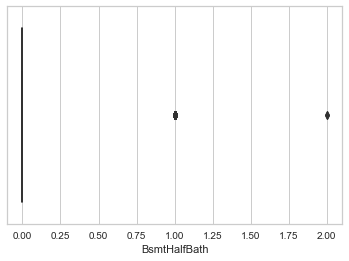

In [296]:
sns.boxplot(trainData['BsmtHalfBath'])

In [297]:
trainData['BsmtHalfBath'].sort_values()

0       0
966     0
965     0
964     0
963     0
       ..
1350    1
611     1
574     1
954     2
597     2
Name: BsmtHalfBath, Length: 1446, dtype: int64

In [298]:
trainData['BsmtBath']=trainData['BsmtHalfBath']+trainData['BsmtFullBath']

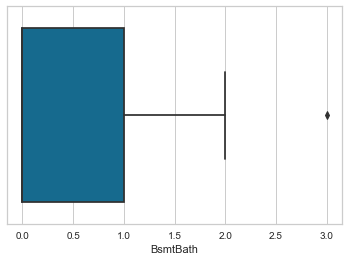

In [299]:
sns.boxplot(trainData['BsmtBath'])

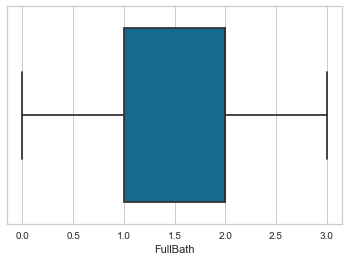

In [300]:
sns.boxplot(trainData['FullBath'])

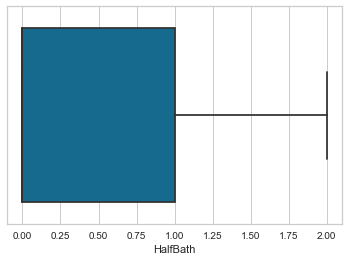

In [301]:
sns.boxplot(trainData['HalfBath'])

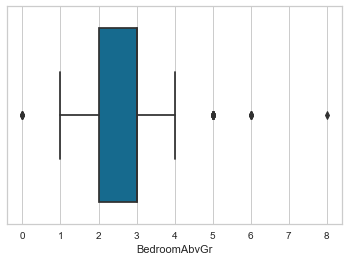

In [302]:
sns.boxplot(trainData['BedroomAbvGr'])

In [303]:
trainData['BedroomAbvGr'].sort_values()

1163    0
189     0
1270    0
634     0
1213    0
       ..
897     6
291     6
330     6
1350    6
635     8
Name: BedroomAbvGr, Length: 1446, dtype: int64

In [304]:
df.iloc[[635]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


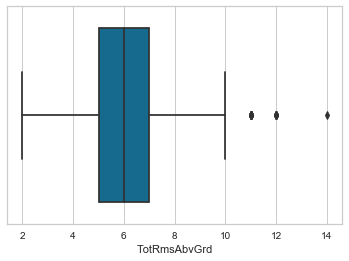

In [305]:
sns.boxplot(trainData['TotRmsAbvGrd'])

In [306]:
trainData['TotRmsAbvGrd'].sort_values()

533      2
690      3
203      3
1449     3
1213     3
        ..
769     12
1031    12
185     12
1230    12
635     14
Name: TotRmsAbvGrd, Length: 1446, dtype: int64

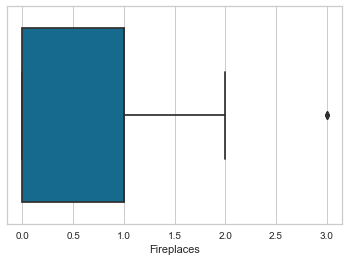

In [307]:
 sns.boxplot(trainData['Fireplaces'])

In [308]:
trainData['Fireplaces'].sort_values()

0      0
800    0
801    0
804    0
805    0
      ..
585    2
642    3
309    3
166    3
605    3
Name: Fireplaces, Length: 1446, dtype: int64

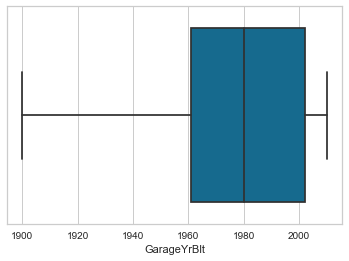

In [309]:
sns.boxplot(trainData['GarageYrBlt'])

In [310]:
trainData['GarageYrBlt'].sort_values()

93      1900.0
653     1906.0
848     1908.0
740     1910.0
246     1910.0
         ...  
1349       NaN
1407       NaN
1449       NaN
1450       NaN
1453       NaN
Name: GarageYrBlt, Length: 1446, dtype: float64

In [311]:
trainData['GarageYrBlt'].fillna(2019,inplace=True)

In [312]:
trainData['GarageYrBlt'].sort_values()

93      1900.0
653     1906.0
848     1908.0
809     1910.0
740     1910.0
         ...  
976     2019.0
1179    2019.0
1337    2019.0
705     2019.0
635     2019.0
Name: GarageYrBlt, Length: 1446, dtype: float64

In [313]:
trainData['GarageYrBlt']=2019-trainData['GarageYrBlt']

In [314]:

trainData['GarageYrBlt'].sort_values()

533       0.0
705       0.0
1323      0.0
1325      0.0
1326      0.0
        ...  
809     109.0
246     109.0
848     111.0
653     113.0
93      119.0
Name: GarageYrBlt, Length: 1446, dtype: float64

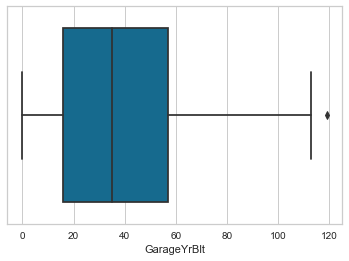

In [315]:
sns.boxplot(trainData['GarageYrBlt'])

In [79]:
nullFilter = trainData.GarageYrBlt.isnull()
sub_df = trainData[nullFilter]
#sub_df.GarageCars.value_counts()
sub_df.GarageArea.value_counts()

0    81
Name: GarageArea, dtype: int64

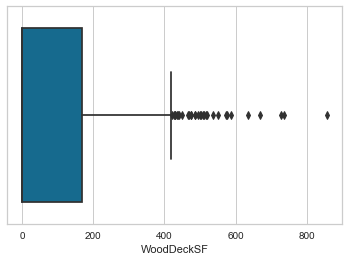

In [316]:
 sns.boxplot(trainData['WoodDeckSF'])

In [317]:
trainData['WoodDeckSF'].sort_values()

0         0
1269      0
693       0
696       0
697       0
       ... 
1210    635
1313    668
1068    728
1459    736
53      857
Name: WoodDeckSF, Length: 1446, dtype: int64

In [318]:
trainData['WoodDeckSF'].value_counts()

0      755
192     38
100     36
144     33
120     31
      ... 
265      1
263      1
260      1
257      1
214      1
Name: WoodDeckSF, Length: 271, dtype: int64

In [319]:
df.iloc[[53]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


In [320]:
trainData=trainData.drop([53])

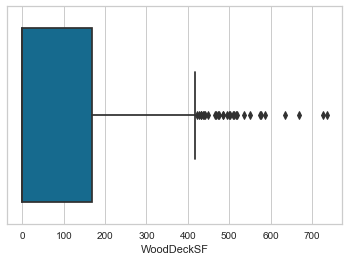

In [321]:
#post outlier removal 
sns.boxplot(trainData['WoodDeckSF'])

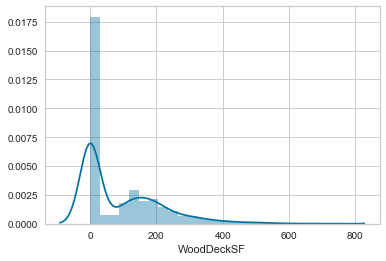

In [322]:
sns.distplot(trainData['WoodDeckSF'])

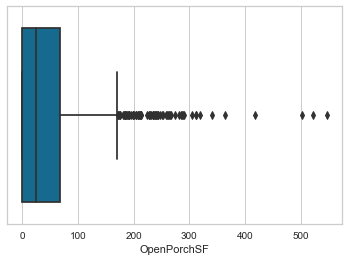

In [323]:
  sns.boxplot(trainData['OpenPorchSF'])

In [324]:
trainData['OpenPorchSF'].sort_values()

733       0
625       0
626       0
627       0
628       0
       ... 
875     364
854     418
583     502
495     523
1328    547
Name: OpenPorchSF, Length: 1445, dtype: int64

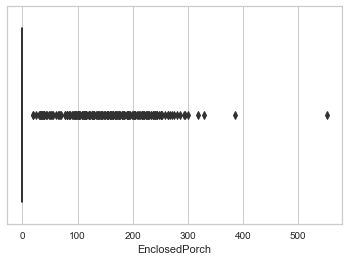

In [325]:
 sns.boxplot(trainData['EnclosedPorch'])

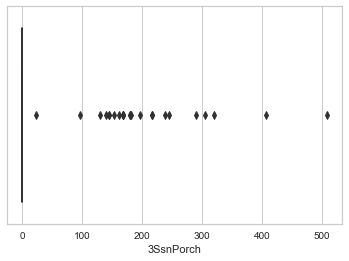

In [326]:
  sns.boxplot(trainData['3SsnPorch'])

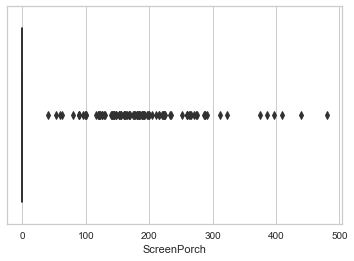

In [327]:
   sns.boxplot(trainData['ScreenPorch'])

In [328]:
trainData['PorchSF']=trainData['ScreenPorch']+trainData['3SsnPorch']+trainData['EnclosedPorch']+trainData['OpenPorchSF']

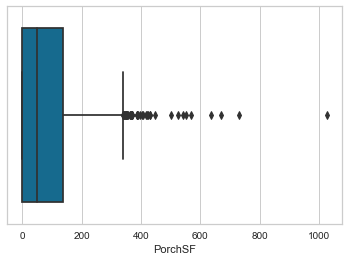

In [329]:
sns.boxplot(trainData['PorchSF'])

In [330]:
trainData['PorchSF'].sort_values()

733        0
1072       0
1071       0
1069       0
482        0
        ... 
197      568
495      638
185      670
854      730
1328    1027
Name: PorchSF, Length: 1445, dtype: int64

In [331]:
df.iloc[[1328]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,1510,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920.0,Unf,2,520,Fa,TA,Y,0,547,0,0,480,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


In [332]:
trainData = trainData.drop([1328])

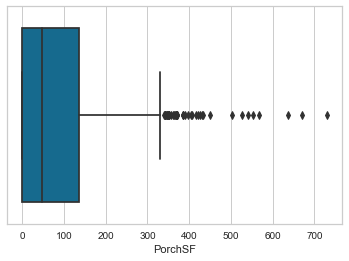

In [333]:
#post outlier removal
sns.boxplot(trainData['PorchSF'])

In [334]:
trainData['PorchSF'].value_counts()

0      454
36      27
40      20
48      18
45      18
      ... 
248      1
106      1
247      1
243      1
730      1
Name: PorchSF, Length: 283, dtype: int64

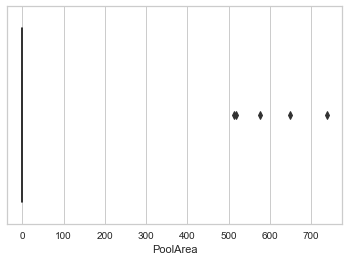

In [335]:
sns.boxplot(trainData['PoolArea'])

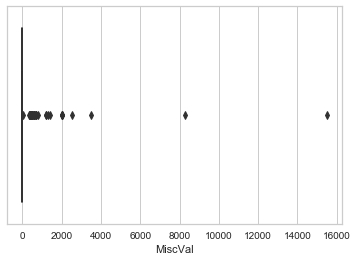

In [336]:
sns.boxplot(trainData['MiscVal'])

In [337]:
trainData['MiscVal'].sort_values()

0           0
978         0
977         0
976         0
975         0
        ...  
539      2000
1457     2500
705      3500
1230     8300
346     15500
Name: MiscVal, Length: 1444, dtype: int64

In [338]:
df.iloc[[346,1230]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498,Unf,0,460,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1960.0,RFn,1,301,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000


In [339]:
trainData=trainData.drop([346,1230])

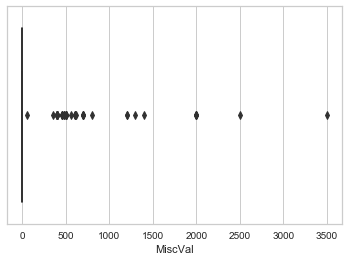

In [340]:
#post outlier removal
sns.boxplot(trainData['MiscVal'])

In [341]:
trainData['MiscVal'].value_counts()

0       1395
400       11
500        7
700        4
450        4
600        4
2000       4
1200       2
480        2
620        1
800        1
3500       1
2500       1
1300       1
1400       1
350        1
54         1
560        1
Name: MiscVal, dtype: int64

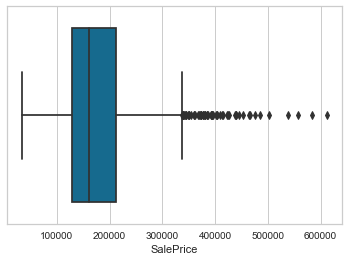

In [342]:
sns.boxplot(trainData['SalePrice'])

In [343]:
trainData['SalePrice'].sort_values()

495      34900
916      35311
968      37900
533      39300
30       40000
         ...  
178     501837
769     538000
1046    556581
803     582933
898     611657
Name: SalePrice, Length: 1442, dtype: int64

In [344]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 1459
Data columns (total 84 columns):
Id               1442 non-null int64
MSSubClass       1442 non-null int64
MSZoning         1442 non-null object
LotFrontage      1442 non-null float64
LotArea          1442 non-null int64
Street           1442 non-null object
Alley            89 non-null object
LotShape         1442 non-null object
LandContour      1442 non-null object
Utilities        1442 non-null object
LotConfig        1442 non-null object
LandSlope        1442 non-null object
Neighborhood     1442 non-null object
Condition1       1442 non-null object
Condition2       1442 non-null object
BldgType         1442 non-null object
HouseStyle       1442 non-null object
OverallQual      1442 non-null int64
OverallCond      1442 non-null int64
YearBuilt        1442 non-null int64
YearRemodAdd     1442 non-null int64
RoofStyle        1442 non-null object
RoofMatl         1442 non-null object
Exterior1st      1442 non-n

In [345]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinSF,BsmtBath,PorchSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,16.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,706,1,61
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,43,43,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,43.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,978,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,18,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,18.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,486,1,42
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,104,49,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,21.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,216,1,307
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,19,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,19.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,655,1,84


In [346]:
trainData['YrSold1']=trainData['YrSold'] -df['YearRemodAdd']

In [347]:
trainData['YrSold2']=trainData['YrSold'] -df['YearBuilt']

In [348]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinSF,BsmtBath,PorchSF,YrSold1,YrSold2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,16.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,706,1,61,5.0,5.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,43,43,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,43.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,978,1,0,31.0,31.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,18,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,18.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,486,1,42,6.0,7.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,104,49,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,21.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,216,1,307,36.0,91.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,19,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,19.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,655,1,84,8.0,8.0


In [349]:
trainData['GrBath']=trainData['FullBath']+trainData['HalfBath']

In [350]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BsmtFinSF,BsmtBath,PorchSF,YrSold1,YrSold2,GrBath
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,731.338419,56.983356,69.473405,9956.599168,6.077670,5.574896,47.852982,34.228155,100.107101,431.328710,45.607490,566.320388,1043.256588,1151.142857,342.634535,5.917476,1499.694868,0.419556,0.056865,1.558252,0.381415,2.862691,1.046463,6.493065,0.601942,38.249653,1.760055,470.272538,92.881415,45.961165,21.925798,3.452150,14.660888,2.075589,25.897365,6.319695,2007.820388,178751.557559,476.936200,0.476422,86.000000,23.048544,36.673370,1.939667
std,421.720412,42.319770,19.820057,5251.265948,1.363065,1.114665,30.264515,20.672690,169.295308,426.084681,159.967363,440.949444,399.359611,361.936193,429.441096,48.921407,490.084003,0.512961,0.237581,0.544741,0.501367,0.810588,0.220225,1.601186,0.636347,25.758583,0.746483,211.953539,122.523469,64.231559,60.959988,29.497376,54.362721,35.554659,185.727941,2.701636,1.331954,74621.003386,445.275166,0.533212,101.858245,20.664610,30.310138,0.788427
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,20.000000,60.000000,7500.000000,5.000000,5.000000,19.000000,15.000000,0.000000,0.000000,0.000000,223.000000,794.000000,880.000000,0.000000,0.000000,1126.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,16.000000,1.000000,326.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129600.000000,0.000000,0.000000,0.000000,4.000000,8.000000,1.000000
50%,733.500000,50.000000,70.050000,9423.000000,6.000000,5.000000,47.000000,26.000000,0.000000,376.000000,0.000000,477.500000,990.000000,1081.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,34.500000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000,458.000000,0.000000,48.000000,14.500000,35.000000,2.000000
75%,1094.750000,70.000000,78.750000,11477.250000,7.000000,6.000000,65.000000,52.750000,161.750000,701.500000,0.000000,808.000000,1277.750000,1378.000000,728.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,57.000000,2.000000,576.000000,168.000000,67.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212675.000000,786.000000,1.000000,135.000000,41.000000,55.000000,3.000000
max,1460.000000,190.000000,182.000000,70761.000000,10.000000,9.000000,147.000000,69.000000,1129.000000,2188.000000,1474.000000,2336.000000,2633.000000,2898.000000,1818.000000,572.000000,3608.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,119.000000,4.000000,1390.000000,736.000000,523.000000,552.000000,508.000000,440.000000,738.000000,3500.000000,1

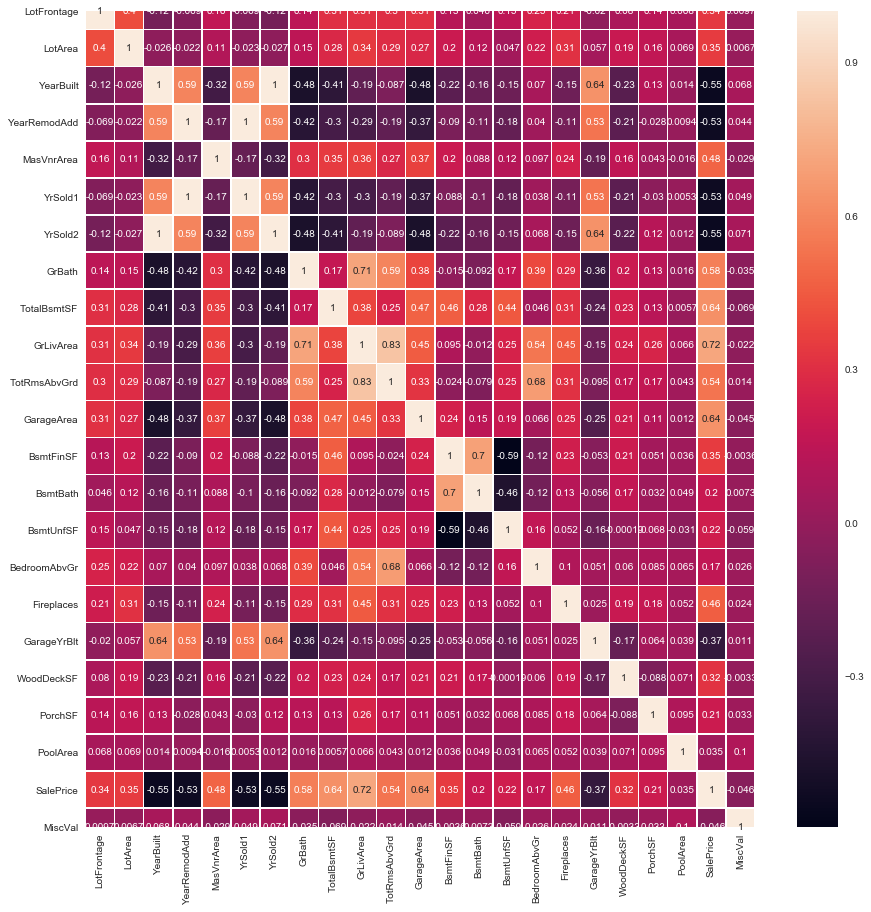

In [354]:
# Create feature to be added for scatterYearRemodAdd
numaric_attributes=['LotFrontage','LotArea','YearBuilt','YearRemodAdd',
                    'MasVnrArea','YrSold1','YrSold2','GrBath',
                     'TotalBsmtSF','GrLivArea','TotRmsAbvGrd','GarageArea',
                    'BsmtFinSF','BsmtBath','BsmtUnfSF','BedroomAbvGr',
                     'Fireplaces','GarageYrBlt','WoodDeckSF','PorchSF',
                     'PoolArea','SalePrice', 'MiscVal']

#'LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','YrSold1','YrSold2','GrBath','TotalBsmtSF',
#'GrLivArea',TotRmsAbvGrd','GarageArea','BsmtFinSF','BsmtBath'
#'BsmtUnfSF','BedroomAbvGr','Fireplaces','GarageYrBlt','WoodDeckSF','PorchSF','PoolArea', 'MiscVal'
# Now create scatter diagram
#scatter_matrix(trainData[attributes],alpha=0.8,figsize=(12,12))
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
#plt.figure(figsize = (16,5))
sns.heatmap(trainData[numaric_attributes].corr(),annot=True, linewidths=.5, ax=ax)

In [390]:
X_train = trainData[['LotFrontage','LotArea','YearBuilt','YearRemodAdd',
                    'MasVnrArea','YrSold1','YrSold2','GrBath',
                     'TotalBsmtSF','GrLivArea','TotRmsAbvGrd','GarageArea',
                    'BsmtFinSF','BsmtBath','BsmtUnfSF','BedroomAbvGr',
                     'Fireplaces','GarageYrBlt','WoodDeckSF','PorchSF']]

Y_train = trainData['SalePrice']

In [391]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

43478.56728102427
[ 1.28479181e+02  8.65588723e-01 -1.75794792e+02 -2.48559233e+02
  3.91238998e+01 -2.97406079e+02 -2.24641638e+02 -3.78660809e+01
  2.55440034e+01  6.08046388e+01  4.51414205e+03  3.99536054e+01
  2.07420142e+01 -1.74764407e+03  4.80198913e+00 -1.35136999e+04
  7.85988178e+03 -6.83196731e+01  1.70759411e+01  3.67885950e+01]


In [392]:
regression_model.score(X = X_train, 
                       y = Y_train)

0.8242538482966992

C:\Users\bhagawat_dayal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


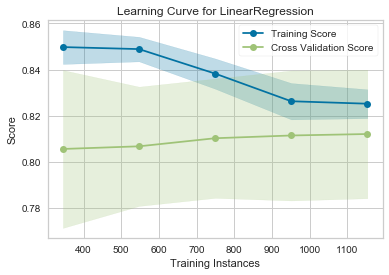

In [393]:
from yellowbrick.model_selection import LearningCurve
#poly_regression_model_out.score(X = X_train_poly_out, y = Y_train_Out)
#n_jobs is to assign number of CPUs
viz = LearningCurve(
    regression_model, cv = 5, train_sizes=np.linspace(0.3, 1.0, num=5),
    scoring='r2', n_jobs=4
)
# Fit and poof the visualizer
viz.fit(X = X_train, y = Y_train)
viz.poof()

# Robust scaling

In [394]:
#robusr scaling for all the numerical features
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()

robust_scaled_df = scaler.fit_transform(X_train)

robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['LotFrontage','LotArea','YearBuilt','YearRemodAdd',
                    'MasVnrArea','YrSold1','YrSold2','GrBath',
                     'TotalBsmtSF','GrLivArea','TotRmsAbvGrd','GarageArea',
                    'BsmtFinSF','BsmtBath','BsmtUnfSF','BedroomAbvGr',
                     'Fireplaces','GarageYrBlt','WoodDeckSF','PorchSF'])

In [395]:
robust_scaled_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,YrSold1,YrSold2,GrBath,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageArea,BsmtFinSF,BsmtBath,BsmtUnfSF,BedroomAbvGr,Fireplaces,GarageYrBlt,WoodDeckSF,PorchSF
0,-0.269333,-0.244641,-0.673913,-0.264901,1.211747,-0.256757,-0.638298,0.5,-0.277003,0.395947,1.0,0.280280,0.315522,1.0,-0.559829,0.0,-1.0,-0.451220,0.000000,0.096296
1,0.530667,0.044503,-0.086957,0.450331,0.000000,0.445946,-0.085106,0.0,0.562274,-0.302416,0.0,-0.072072,0.661578,1.0,-0.330769,0.0,0.0,0.207317,1.773810,-0.355556
2,-0.109333,0.459363,-0.630435,-0.238411,1.001546,-0.229730,-0.595745,0.5,-0.144703,0.514419,0.0,0.520521,0.035623,1.0,-0.074359,0.0,0.0,-0.402439,0.000000,-0.044444
3,-0.536000,0.031932,1.239130,0.609272,0.000000,0.581081,1.191489,-0.5,-0.483721,0.406859,0.5,0.656657,-0.307888,1.0,0.106838,0.0,0.0,-0.329268,0.000000,1.918519
4,0.744000,1.216167,-0.608696,-0.185430,2.163833,-0.175676,-0.574468,0.5,0.320413,1.156664,1.5,1.433433,0.250636,1.0,0.021368,1.0,0.0,-0.378049,1.142857,0.266667


In [396]:
robust_scaled_df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,YrSold1,YrSold2,GrBath,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageArea,BsmtFinSF,BsmtBath,BsmtUnfSF,BedroomAbvGr,Fireplaces,GarageYrBlt,WoodDeckSF,PorchSF
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,-0.030752,0.134163,0.018543,0.217964,0.618900,0.231042,0.035604,-0.030166,0.110091,0.068114,0.246533,-0.030941,0.024092,0.476422,0.151830,-0.137309,-0.398058,0.091455,0.552866,0.281481
std,1.057070,1.320326,0.657924,0.547621,1.046648,0.558503,0.644897,0.394214,0.825550,0.763966,0.800593,0.848663,0.566508,0.533212,0.753760,0.810588,0.636347,0.628258,0.729306,0.754506
min,-2.616000,-2.042366,-0.826087,-0.450331,0.000000,-0.391892,-0.744681,-1.000000,-2.046512,-1.749026,-2.000000,-1.913914,-0.582697,0.000000,-0.816239,-3.000000,-1.000000,-0.841463,0.000000,-0.355556
25%,-0.536000,-0.483500,-0.608696,-0.291391,0.000000,-0.283784,-0.574468,-0.500000,-0.405168,-0.513640,-0.500000,-0.607608,-0.582697,0.000000,-0.435043,-1.000000,-1.000000,-0.451220,0.000000,-0.355556
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.464000,0.516500,0.391304,0.708609,1.000000,0.716216,0.425532,0.500000,0.594832,0.486360,0.500000,0.392392,0.417303,1.000000,0.564957,0.000000,0.000000,0.548780,1.000000,0.644444
max,5.970667,15.422214,2.173913,1.139073,6.979907,1.229730,2.148936,1.000000,3.396382,3.354638,4.000000,3.651652,2.201018,3.000000,3.176923,5.000000,2.000000,2.060976,4.380952,5.051852


In [397]:
X_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,YrSold1,YrSold2,GrBath,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageArea,BsmtFinSF,BsmtBath,BsmtUnfSF,BedroomAbvGr,Fireplaces,GarageYrBlt,WoodDeckSF,PorchSF
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,69.473405,9956.599168,47.852982,34.228155,100.107101,23.048544,36.673370,1.939667,1043.256588,1499.694868,6.493065,470.272538,476.936200,0.476422,566.320388,2.862691,0.601942,38.249653,92.881415,86.000000
std,19.820057,5251.265948,30.264515,20.672690,169.295308,20.664610,30.310138,0.788427,399.359611,490.084003,1.601186,211.953539,445.275166,0.533212,440.949444,0.810588,0.636347,25.758583,122.523469,101.858245
min,21.000000,1300.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7500.000000,19.000000,15.000000,0.000000,4.000000,8.000000,1.000000,794.000000,1126.500000,5.000000,326.250000,0.000000,0.000000,223.000000,2.000000,0.000000,16.000000,0.000000,0.000000
50%,70.050000,9423.000000,47.000000,26.000000,0.000000,14.500000,35.000000,2.000000,990.000000,1456.000000,6.000000,478.000000,458.000000,0.000000,477.500000,3.000000,1.000000,34.500000,0.000000,48.000000
75%,78.750000,11477.250000,65.000000,52.750000,161.750000,41.000000,55.000000,3.000000,1277.750000,1768.000000,7.000000,576.000000,786.000000,1.000000,808.000000,3.000000,1.000000,57.000000,168.000000,135.000000
max,182.000000,70761.000000,147.000000,69.000000,1129.000000,60.000000,136.000000,4.000000,2633.000000,3608.000000,14.000000,1390.000000,2188.000000,3.000000,2336.000000,8.000000,3.000000,119.000000,736.000000,730.000000


In [398]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(robust_scaled_df, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

172564.74504917796
[  2408.98464083   3442.662747    -8547.36483955  -9004.9508888
   6328.29078967 -11374.67196415 -10087.33509023    -75.73216186
  15792.5045953   39006.17580511   9028.28409206   9978.41294466
  10721.05043968  -1747.64407195  -1345.50691899 -13513.69994998
   7859.88178299  -2801.10659591   2868.75810743   4966.46032857]


In [399]:
regression_model.score(X = robust_scaled_df, 
                       y = Y_train)

0.8242538482966992

C:\Users\bhagawat_dayal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


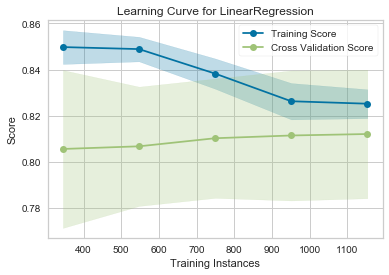

In [400]:
from yellowbrick.model_selection import LearningCurve
#poly_regression_model_out.score(X = X_train_poly_out, y = Y_train_Out)
#n_jobs is to assign number of CPUs
viz = LearningCurve(
    regression_model, cv = 5, train_sizes=np.linspace(0.3, 1.0, num=5),
    scoring='r2', n_jobs=4
)
# Fit and poof the visualizer
viz.fit(X = robust_scaled_df, y = Y_train)
viz.poof()

# Categorical features
using learning from "LR practice - feature engg for categorical features"

In [448]:
trainData['Alley'].fillna("No alley access", inplace=True)
trainData['BsmtQual'].fillna("No basement", inplace=True)
trainData['BsmtCond'].fillna("No basement", inplace=True)
trainData['BsmtExposure'].fillna("No basement", inplace=True)
trainData['BsmtFinType1'].fillna("No basement", inplace=True)
trainData['BsmtFinType2'].fillna("No basement", inplace=True)
trainData['GarageType'].fillna("No Garage", inplace=True)
trainData['GarageFinish'].fillna("No Garage", inplace=True)
trainData['GarageQual'].fillna("No Garage", inplace=True)
trainData['GarageCond'].fillna("No Garage", inplace=True)
trainData['PoolQC'].fillna("No Pool", inplace=True)
trainData['Fence'].fillna("No Fence", inplace=True)
trainData['MiscFeature'].fillna("None", inplace=True)
trainData['FireplaceQu'].fillna("No Fireplace", inplace=True)
trainData['MasVnrType'].fillna("None", inplace=True)
trainData['Electrical'].fillna("SBrkr", inplace=True)

In [449]:
X_train_cat=trainData[['MSSubClass','Neighborhood','BldgType','HeatingQC',
                       'GarageType','BsmtFinType1','LandSlope','LotShape',
                       'HouseStyle','Exterior2nd','Exterior1st','GarageFinish',
                       'LotConfig','BsmtQual','OverallQual','BsmtExposure',
                       'RoofStyle','FireplaceQu','KitchenQual','Foundation',
                       'Utilities','OverallCond','Condition1','RoofMatl',
                       'Electrical','ExterQual','SaleCondition','SaleType',
                       'Fence','BsmtCond','MasVnrType','BsmtFinType2',
                       'GarageQual','LandContour','MSZoning']]

In [450]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object with all categorical features 
# indicating the first column 
onehotencoder = OneHotEncoder() 
data = onehotencoder.fit_transform(X_train_cat)


In [451]:
data

<1442x248 sparse matrix of type '<class 'numpy.float64'>'
	with 50470 stored elements in Compressed Sparse Row format>

In [452]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(data, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

191342.76425663746
[ 7.23377379e+03 -8.63805776e+03 -1.15779179e+03 -7.93283286e+02
  9.05549158e+03  5.64849836e+03 -2.70710260e+02  1.22777763e+04
  2.20258011e+04  2.44215710e+04  9.01015749e+03 -3.05704383e+04
 -3.93414493e+04 -1.23708186e+04  3.46947976e+03 -1.74219152e+03
 -4.08224482e+03  5.00332717e+03 -6.39337294e+03  1.56575302e+04
 -1.04525864e+04  2.03051189e+04 -1.60870192e+04 -1.83905096e+04
 -1.86492978e+04 -1.51764053e+04 -8.62713818e+03 -1.36544580e+04
  9.67451692e+03 -4.63880874e+03  4.11575547e+04  1.70012656e+04
 -1.37999524e+04 -1.25084524e+04 -1.09391576e+04 -5.00976889e+02
 -9.49600020e+02  4.14661406e+04 -6.25528432e+03  1.25820022e+04
 -7.55007144e+02 -6.58141040e+03  9.01015749e+03 -1.03024177e+03
 -6.43498178e+02  4.63963438e+03 -7.12725512e+03  5.10356210e+02
  1.91537318e+03  6.18913447e+01 -2.50063126e+03  2.15885152e+03
 -1.68183157e+03  1.52170613e+04 -8.10838678e+03  1.00846194e+02
 -5.18590942e+03  2.93606536e+03  9.91839228e+02  7.98395128e+03
 -2.51

In [453]:
regression_model.score(X = data, 
                       y = Y_train)

0.8847361382248803

C:\Users\bhagawat_dayal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


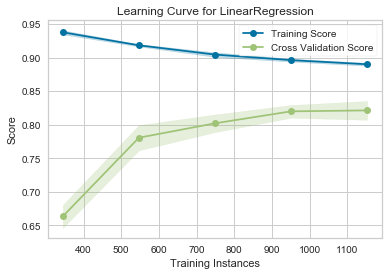

In [454]:
from yellowbrick.model_selection import LearningCurve
#poly_regression_model_out.score(X = X_train_poly_out, y = Y_train_Out)
#n_jobs is to assign number of CPUs
viz = LearningCurve(
    regression_model, cv = 5, train_sizes=np.linspace(0.3, 1.0, num=5),
    scoring='r2', n_jobs=4
)
# Fit and poof the visualizer
viz.fit(X = data, y = Y_train)
viz.poof()

In [455]:
data=pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 1 columns):
0    1442 non-null object
dtypes: object(1)
memory usage: 11.4+ KB


In [456]:
robust_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 20 columns):
LotFrontage     1442 non-null float64
LotArea         1442 non-null float64
YearBuilt       1442 non-null float64
YearRemodAdd    1442 non-null float64
MasVnrArea      1442 non-null float64
YrSold1         1442 non-null float64
YrSold2         1442 non-null float64
GrBath          1442 non-null float64
TotalBsmtSF     1442 non-null float64
GrLivArea       1442 non-null float64
TotRmsAbvGrd    1442 non-null float64
GarageArea      1442 non-null float64
BsmtFinSF       1442 non-null float64
BsmtBath        1442 non-null float64
BsmtUnfSF       1442 non-null float64
BedroomAbvGr    1442 non-null float64
Fireplaces      1442 non-null float64
GarageYrBlt     1442 non-null float64
WoodDeckSF      1442 non-null float64
PorchSF         1442 non-null float64
dtypes: float64(20)
memory usage: 225.4 KB


In [457]:
X_train_categorical =trainData[['MSSubClass','Neighborhood','BldgType','HeatingQC',
                       'GarageType','BsmtFinType1','LandSlope','LotShape',
                       'HouseStyle','Exterior2nd','Exterior1st','GarageFinish',
                       'LotConfig','BsmtQual','OverallQual','BsmtExposure',
                       'RoofStyle','FireplaceQu','KitchenQual','Foundation',
                       'Utilities','OverallCond','Condition1','RoofMatl',
                       'Electrical','ExterQual','SaleCondition','SaleType',
                       'Fence','BsmtCond','MasVnrType','BsmtFinType2',
                       'GarageQual','LandContour','MSZoning']]
X_train_categorical = X_train_categorical.astype(str)
X_train_numerical= trainData[['LotFrontage','LotArea','YearBuilt','YearRemodAdd',
                    'MasVnrArea','YrSold1','YrSold2','GrBath',
                     'TotalBsmtSF','GrLivArea','TotRmsAbvGrd','GarageArea',
                    'BsmtFinSF','BsmtBath','BsmtUnfSF','BedroomAbvGr',
                     'Fireplaces','GarageYrBlt','WoodDeckSF','PorchSF']]

In [458]:
X_train_final = pd.concat([X_train_numerical,X_train_categorical], axis=1)

In [459]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 1459
Data columns (total 55 columns):
LotFrontage      1442 non-null float64
LotArea          1442 non-null int64
YearBuilt        1442 non-null int64
YearRemodAdd     1442 non-null int64
MasVnrArea       1442 non-null float64
YrSold1          1442 non-null float64
YrSold2          1442 non-null float64
GrBath           1442 non-null int64
TotalBsmtSF      1442 non-null int64
GrLivArea        1442 non-null int64
TotRmsAbvGrd     1442 non-null int64
GarageArea       1442 non-null int64
BsmtFinSF        1442 non-null int64
BsmtBath         1442 non-null int64
BsmtUnfSF        1442 non-null int64
BedroomAbvGr     1442 non-null int64
Fireplaces       1442 non-null int64
GarageYrBlt      1442 non-null float64
WoodDeckSF       1442 non-null int64
PorchSF          1442 non-null int64
MSSubClass       1442 non-null object
Neighborhood     1442 non-null object
BldgType         1442 non-null object
HeatingQC        1442 non-nul

In [461]:
X_train_final.reset_index()

,index,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,YrSold1,YrSold2,GrBath,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageArea,BsmtFinSF,BsmtBath,BsmtUnfSF,BedroomAbvGr,Fireplaces,GarageYrBlt,WoodDeckSF,PorchSF,MSSubClass,Neighborhood,BldgType,HeatingQC,GarageType,BsmtFinType1,LandSlope,LotShape,HouseStyle,Exterior2nd,Exterior1st,GarageFinish,LotConfig,BsmtQual,OverallQual,BsmtExposure,RoofStyle,FireplaceQu,KitchenQual,Foundation,Utilities,OverallCond,Condition1,RoofMatl,Electrical,ExterQual,SaleCondition,SaleType,Fence,BsmtCond,MasVnrType,BsmtFinType2,GarageQual,LandContour,MSZoning
0,0,65.0,8450,16,16,196.0,5.0,5.0,3,856,1710,8,548,706,1,150,3,0,16.0,0,61,60,CollgCr,1Fam,Ex,Attchd,GLQ,Gtl,Reg,2Story,VinylSd,VinylSd,RFn,Inside,Gd,7,No,Gable,No Fireplace,Gd,PConc,AllPub,5,Norm,CompShg,SBrkr,Gd,Normal,WD,No Fence,TA,BrkFace,Unf,TA,Lvl,RL
1,1,80.0,9600,43,43,0.0,31.0,31.0,2,1262,1262,6,460,978,1,284,3,1,43.0,298,0,20,Veenker,1Fam,Ex,Attchd,ALQ,Gtl,Reg,1Story,MetalSd,MetalSd,RFn,FR2,Gd,6,Gd,Gable,TA,TA,CBlock,AllPub,8,Feedr,CompShg,SBrkr,TA,Normal,WD,No Fence,TA,None,Unf,TA,Lvl,RL
2,2,68.0,11250,18,17,162.0,6.0,7.0,3,920,1786,6,608,486,1,434,3,1,18.0,0,42,60,CollgCr,1Fam,Ex,Attchd,GLQ,Gtl,IR1,2Story,VinylSd,VinylSd,RFn,Inside,Gd,7,Mn,Gable,TA,Gd,PConc,AllPub,5,Norm,CompShg,SBrkr,Gd,Normal,WD,No Fence,TA,BrkFace,Unf,TA,Lvl,RL
3,3,60.0,9550,104,49,0.0,36.0,91.0,1,756,1717,7,642,216,1,540,3,1,21.0,0,307,70,Crawfor,1Fam,Gd,Detchd,ALQ,Gtl,IR1,2Story,Wd Shng,Wd Sdng,Unf,Corner,TA,7,No,Gable,Gd,Gd,BrkTil,AllPub,5,Norm,CompShg,SBrkr,TA,Abnorml,WD,No Fence,Gd,None,Unf,TA,Lvl,RL
4,4,84.0,14260,19,19,350.0,8.0,8.0,3,1145,2198,9,836,655,1,490,4,1,19.0,192,84,60,NoRidge,1Fam,Ex,Attchd,GLQ,Gtl,IR1,2Story,VinylSd,VinylSd,RFn,FR2,Gd,8,Av,Gable,TA,Gd,PConc,AllPub,5,Norm,CompShg,SBrkr,Gd,Normal,WD,No Fence,TA,BrkFace,Unf,TA,Lvl,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1455,62.0,7917,20,19,0.0,7.0,8.0,3,953,1647,7,460,0,0,953,3,1,20.0,0,40,60,Gilbert,1Fam,Ex,Attchd,Unf,Gtl,Reg,2Story,VinylSd,VinylSd,RFn,Inside,Gd,6,No,Gable,TA,TA,PConc,AllPub,5,Norm,CompShg,SBrkr,TA,Normal,WD,No Fence,TA,None,Unf,TA,Lvl,RL
1438,1456,85.0,13175,41,31,119.0,22.0,32.0,2,1542,2073,7,500,953,1,589,3,2,41.0,349,0,20,NWAmes,1Fam,TA,Attchd,ALQ,Gtl,Reg,1Story,Plywood,Plywood,Unf,Inside,Gd,6,No,Gable,TA,TA,CBlock,AllPub,6,Norm,CompShg,SBrkr,TA,Normal,WD,MnPrv,TA,Stone,Rec,TA,Lvl,RL
1439,1457,66.0,9042,78,13,0.0,4.0,69.0,2,1152,2340,9,252,275,0,877,4,2,78.0,0,60,70,Crawfor,1Fam,Ex,Attchd,GLQ,Gtl,Reg,2Story,CmentBd,CemntBd,RFn,Inside,TA,7,No,Gable,Gd,Gd,Stone,AllPub,9,Norm,CompShg,SBrkr,Ex,Normal,WD,GdPrv,Gd,None,Unf,TA,Lvl,RL
1440,1458,68.0,9717,69,23,0.0,14.0,60.0,1,1078,1078,5,240,1078,1,0,2,0,69.0,366,112,20,NAmes,1Fam,Gd,Attchd,GLQ,Gtl,Reg,1Story,MetalSd,MetalSd,Unf,Inside,TA,5,Mn,Hip,No Fireplace,Gd,CBlock,AllPub,6,Norm,CompShg,FuseA,TA,Normal,WD,No Fence,TA,None,Rec,TA,Lvl,RL


In [462]:
Y_train.reset_index()

,index,SalePrice
0,0,208500
1,1,181500
2,2,223500
3,3,140000
4,4,250000
...,...,...
1437,1455,175000
1438,1456,210000
1439,1457,266500
1440,1458,142125


In [466]:
from sklearn.preprocessing import RobustScaler
from sklearn_pandas import DataFrameMapper
mapper = DataFrameMapper([
    (['LotFrontage'],RobustScaler()),(['LotArea'],RobustScaler()),
    (['YearBuilt'],RobustScaler()),(['YearRemodAdd'],RobustScaler()),
    (['MasVnrArea'],RobustScaler()),(['YrSold1'],RobustScaler()),(['YrSold2'],RobustScaler()),
    (['GrBath'],RobustScaler()),(['TotalBsmtSF'],RobustScaler()),(['GrLivArea'],RobustScaler()),
    (['TotRmsAbvGrd'],RobustScaler()),(['GarageArea'],RobustScaler()),(['BsmtFinSF'],RobustScaler()),
    (['BsmtBath'],RobustScaler()),(['BsmtUnfSF'],RobustScaler()),(['BedroomAbvGr'],RobustScaler()),
    (['Fireplaces'],RobustScaler()),(['GarageYrBlt'],RobustScaler()),(['WoodDeckSF'],RobustScaler()),
    (['PorchSF'],RobustScaler()),
     (['MSSubClass'],OneHotEncoder()),(['Neighborhood'],OneHotEncoder()),
    (['BldgType'],OneHotEncoder()),(['HeatingQC'],OneHotEncoder()),
    (['GarageType'],OneHotEncoder()),(['BsmtFinType1'],OneHotEncoder()),
    (['LandSlope'],OneHotEncoder()),(['LotShape'],OneHotEncoder()),
    (['HouseStyle'],OneHotEncoder()),(['Exterior2nd'],OneHotEncoder()),
    (['Exterior1st'],OneHotEncoder()),(['GarageFinish'],OneHotEncoder()),
    (['LotConfig'],OneHotEncoder()),(['BsmtQual'],OneHotEncoder()),
    (['OverallQual'],OneHotEncoder()),(['BsmtExposure'],OneHotEncoder()),
    (['RoofStyle'],OneHotEncoder()),(['FireplaceQu'],OneHotEncoder()),
    (['KitchenQual'],OneHotEncoder()),(['Foundation'],OneHotEncoder()),
    (['Utilities'],OneHotEncoder()),(['OverallCond'],OneHotEncoder()),
    (['Condition1'],OneHotEncoder()),(['RoofMatl'],OneHotEncoder()),
    (['Electrical'],OneHotEncoder()),(['ExterQual'],OneHotEncoder()),
    (['SaleCondition'],OneHotEncoder()),(['SaleType'],OneHotEncoder()),
    (['Fence'],OneHotEncoder()),(['BsmtCond'],OneHotEncoder()),(['MasVnrType'],OneHotEncoder()),
    (['BsmtFinType2'],OneHotEncoder()),(['GarageQual'],OneHotEncoder()),(['LandContour'],OneHotEncoder()),
    (['MSZoning'],OneHotEncoder())    
], df_out=True)

In [467]:
new_df = mapper.fit_transform(X_train_final)

In [471]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 1459
Columns: 268 entries, LotFrontage to MSZoning_x0_RM
dtypes: float64(268)
memory usage: 3.0 MB


In [472]:
new_df.reset_index()

,index,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,YrSold1,YrSold2,GrBath,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageArea,BsmtFinSF,BsmtBath,BsmtUnfSF,BedroomAbvGr,Fireplaces,GarageYrBlt,WoodDeckSF,PorchSF,MSSubClass_x0_120,MSSubClass_x0_160,MSSubClass_x0_180,MSSubClass_x0_190,MSSubClass_x0_20,MSSubClass_x0_30,MSSubClass_x0_40,MSSubClass_x0_45,MSSubClass_x0_50,MSSubClass_x0_60,MSSubClass_x0_70,MSSubClass_x0_75,MSSubClass_x0_80,MSSubClass_x0_85,MSSubClass_x0_90,Neighborhood_x0_Blmngtn,Neighborhood_x0_Blueste,Neighborhood_x0_BrDale,Neighborhood_x0_BrkSide,Neighborhood_x0_ClearCr,Neighborhood_x0_CollgCr,Neighborhood_x0_Crawfor,Neighborhood_x0_Edwards,Neighborhood_x0_Gilbert,Neighborhood_x0_IDOTRR,Neighborhood_x0_MeadowV,Neighborhood_x0_Mitchel,Neighborhood_x0_NAmes,Neighborhood_x0_NPkVill,Neighborhood_x0_NWAmes,Neighborhood_x0_NoRidge,Neighborhood_x0_NridgHt,Neighborhood_x0_OldTown,Neighborhood_x0_SWISU,Neighborhood_x0_Sawyer,Neighborhood_x0_SawyerW,Neighborhood_x0_Somerst,Neighborhood_x0_StoneBr,Neighborhood_x0_Timber,Neighborhood_x0_Veenker,BldgType_x0_1Fam,BldgType_x0_2fmCon,BldgType_x0_Duplex,BldgType_x0_Twnhs,BldgType_x0_TwnhsE,HeatingQC_x0_Ex,HeatingQC_x0_Fa,HeatingQC_x0_Gd,HeatingQC_x0_Po,HeatingQC_x0_TA,GarageType_x0_2Types,GarageType_x0_Attchd,GarageType_x0_Basment,GarageType_x0_BuiltIn,GarageType_x0_CarPort,GarageType_x0_Detchd,GarageType_x0_No Garage,BsmtFinType1_x0_ALQ,BsmtFinType1_x0_BLQ,BsmtFinType1_x0_GLQ,BsmtFinType1_x0_LwQ,BsmtFinType1_x0_No basement,BsmtFinType1_x0_Rec,BsmtFinType1_x0_Unf,LandSlope_x0_Gtl,LandSlope_x0_Mod,LandSlope_x0_Sev,LotShape_x0_IR1,LotShape_x0_IR2,LotShape_x0_IR3,LotShape_x0_Reg,HouseStyle_x0_1.5Fin,HouseStyle_x0_1.5Unf,HouseStyle_x0_1Story,HouseStyle_x0_2.5Fin,HouseStyle_x0_2.5Unf,HouseStyle_x0_2Story,HouseStyle_x0_SFoyer,HouseStyle_x0_SLvl,Exterior2nd_x0_AsbShng,Exterior2nd_x0_AsphShn,Exterior2nd_x0_Brk Cmn,Exterior2nd_x0_BrkFace,Exterior2nd_x0_CBlock,Exterior2nd_x0_CmentBd,Exterior2nd_x0_HdBoard,Exterior2nd_x0_ImStucc,Exterior2nd_x0_MetalSd,Exterior2nd_x0_Other,Exterior2nd_x0_Plywood,Exterior2nd_x0_Stone,Exterior2nd_x0_Stucco,Exterior2nd_x0_VinylSd,Exterior2nd_x0_Wd Sdng,Exterior2nd_x0_Wd Shng,Exterior1st_x0_AsbShng,Exterior1st_x0_AsphShn,Exterior1st_x0_BrkComm,Exterior1st_x0_BrkFace,Exterior1st_x0_CBlock,Exterior1st_x0_CemntBd,Exterior1st_x0_HdBoard,Exterior1st_x0_ImStucc,Exterior1st_x0_MetalSd,Exterior1st_x0_Plywood,Exterior1st_x0_Stone,Exterior1st_x0_Stucco,Exterior1st_x0_VinylSd,Exterior1st_x0_Wd Sdng,Exterior1st_x0_WdShing,GarageFinish_x0_Fin,GarageFinish_x0_No Garage,GarageFinish_x0_RFn,GarageFinish_x0_Unf,LotConfig_x0_Corner,LotConfig_x0_CulDSac,LotConfig_x0_FR2,LotConfig_x0_FR3,LotConfig_x0_Inside,BsmtQual_x0_Ex,BsmtQual_x0_Fa,BsmtQual_x0_Gd,BsmtQual_x0_No basement,BsmtQual_x0_TA,OverallQual_x0_1,OverallQual_x0_10,OverallQual_x0_2,OverallQual_x0_3,OverallQual_x0_4,OverallQual_x0_5,OverallQual_x0_6,OverallQual_x0_7,OverallQual_x0_8,OverallQual_x0_9,BsmtExposure_x0_Av,BsmtExposure_x0_Gd,BsmtExposure_x0_Mn,BsmtExposure_x0_No,BsmtExposure_x0_No basement,RoofStyle_x0_Flat,RoofStyle_x0_Gable,RoofStyle_x0_Gambrel,RoofStyle_x0_Hip,RoofStyle_x0_Mansard,RoofStyle_x0_Shed,FireplaceQu_x0_Ex,FireplaceQu_x0_Fa,FireplaceQu_x0_Gd,FireplaceQu_x0_No Fireplace,FireplaceQu_x0_Po,FireplaceQu_x0_TA,KitchenQual_x0_Ex,KitchenQual_x0_Fa,KitchenQual_x0_Gd,KitchenQual_x0_TA,Foundation_x0_BrkTil,Foundation_x0_CBlock,Foundation_x0_PConc,Foundation_x0_Slab,Foundation_x0_Stone,Foundation_x0_Wood,Utilities_x0_AllPub,Utilities_x0_NoSeWa,OverallCond_x0_1,OverallCond_x0_2,OverallCond_x0_3,OverallCond_x0_4,OverallCond_x0_5,OverallCond_x0_6,OverallCond_x0_7,OverallCond_x0_8,OverallCond_x0_9,Condition1_x0_Artery,Condition1_x0_Feedr,Condition1_x0_Norm,Condition1_x0_PosA,Condition1_x0_PosN,Condition1_x0_RRAe,Condition1_x0_RRAn,Condition1_x0_RRNe,Condition1_x0_RRNn,RoofMatl_x0_CompShg,RoofMatl_x0_Membran,RoofMatl_x0_Metal,RoofMatl_x0_Roll,RoofMatl_x0_Tar&Grv,RoofMatl_x0_WdShake,RoofMatl_x0_WdShngl,Electrical_x0

In [476]:
new_df1 = new_df.to_numpy()

In [477]:
new_df1

array([[-0.26933333, -0.2446414 , -0.67391304, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.53066667,  0.04450311, -0.08695652, ...,  0.        ,
         1.        ,  0.        ],
       [-0.10933333,  0.45936262, -0.63043478, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.216     , -0.09579483,  0.67391304, ...,  0.        ,
         1.        ,  0.        ],
       [-0.10933333,  0.07392042,  0.47826087, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.264     ,  0.12923502,  0.15217391, ...,  0.        ,
         1.        ,  0.        ]])

In [473]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(new_df, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

-996949887103220.8
[ 3.70984122e+02  4.12977810e+03 -6.06158544e+15  4.97445327e+15
  2.70822865e+03 -4.87562307e+15  6.19335904e+15  8.05088337e+03
  1.33274703e+15  2.92451250e+04  1.63434375e+03  5.85275000e+03
 -2.16545564e+15  1.23275000e+03 -1.61169409e+15 -1.55400000e+03
  3.32781250e+03  9.80125000e+02  2.49050000e+03  4.23175000e+03
 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13
 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13
 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13
 -1.59810305e+13 -1.59810305e+13 -1.71476978e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.21

In [474]:
regression_model.score(X = new_df, 
                       y = Y_train)

0.9392286999617258

C:\Users\bhagawat_dayal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


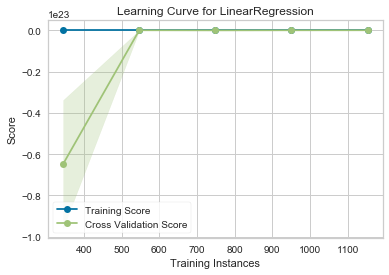

In [475]:
from yellowbrick.model_selection import LearningCurve
#poly_regression_model_out.score(X = X_train_poly_out, y = Y_train_Out)
#n_jobs is to assign number of CPUs
viz = LearningCurve(
    regression_model, cv = 5, train_sizes=np.linspace(0.3, 1.0, num=5),
    scoring='r2', n_jobs=4
)
# Fit and poof the visualizer
viz.fit(X = new_df, y = Y_train)
viz.poof()

In [478]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(new_df1, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

-996949887103220.8
[ 3.70984122e+02  4.12977810e+03 -6.06158544e+15  4.97445327e+15
  2.70822865e+03 -4.87562307e+15  6.19335904e+15  8.05088337e+03
  1.33274703e+15  2.92451250e+04  1.63434375e+03  5.85275000e+03
 -2.16545564e+15  1.23275000e+03 -1.61169409e+15 -1.55400000e+03
  3.32781250e+03  9.80125000e+02  2.49050000e+03  4.23175000e+03
 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13
 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13
 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13 -1.59810305e+13
 -1.59810305e+13 -1.59810305e+13 -1.71476978e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13 -4.04136329e+13
 -4.21

In [479]:
regression_model.score(X = new_df, 
                       y = Y_train)

0.9392286999617258

C:\Users\bhagawat_dayal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


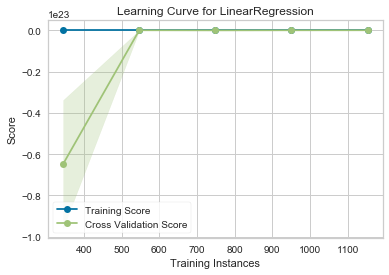

In [480]:
from yellowbrick.model_selection import LearningCurve
#poly_regression_model_out.score(X = X_train_poly_out, y = Y_train_Out)
#n_jobs is to assign number of CPUs
viz = LearningCurve(
    regression_model, cv = 5, train_sizes=np.linspace(0.3, 1.0, num=5),
    scoring='r2', n_jobs=4
)
# Fit and poof the visualizer
viz.fit(X = new_df1, y = Y_train)
viz.poof()

# Initial feature engg for categorical features.... final is in seperate file

In [113]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [114]:
categoric_attributes=['MSSubClass','MSZoning','Street','Alley','LotShape',
                      'LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                      'Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                      'OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                      'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
                      'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                      'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                      'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                      'PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

In [115]:
X1 = trainData[['MSSubClass','MSZoning','Street','Alley','LotShape',
                      'LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                      'Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                      'OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                      'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
                      'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                      'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                      'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                      'PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]

Y1 = trainData[['SalePrice']]

In [116]:
X1 = X1.reset_index()

In [118]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 47 columns):
index            1443 non-null int64
MSSubClass       1443 non-null int64
MSZoning         1443 non-null object
Street           1443 non-null object
Alley            89 non-null object
LotShape         1443 non-null object
LandContour      1443 non-null object
Utilities        1443 non-null object
LotConfig        1443 non-null object
LandSlope        1443 non-null object
Neighborhood     1443 non-null object
Condition1       1443 non-null object
Condition2       1443 non-null object
BldgType         1443 non-null object
HouseStyle       1443 non-null object
OverallQual      1443 non-null int64
OverallCond      1443 non-null int64
RoofStyle        1443 non-null object
RoofMatl         1443 non-null object
Exterior1st      1443 non-null object
Exterior2nd      1443 non-null object
MasVnrType       1435 non-null object
ExterQual        1443 non-null object
ExterCond        1443 non

In [119]:
Y1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 0 to 1459
Data columns (total 1 columns):
SalePrice    1443 non-null int64
dtypes: int64(1)
memory usage: 62.5 KB


In [120]:
Y1 = Y1.reset_index()

In [121]:
Y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 2 columns):
index        1443 non-null int64
SalePrice    1443 non-null int64
dtypes: int64(2)
memory usage: 22.7 KB


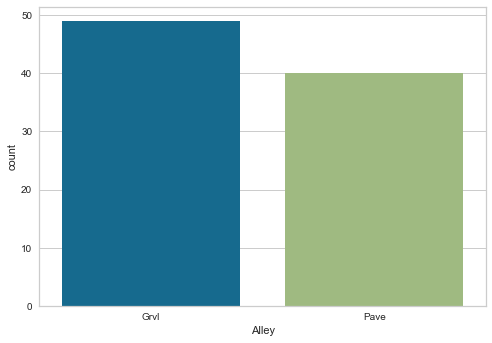

In [122]:
sns.countplot(x="Alley",data=X1)

In [124]:
X1['Alley'].fillna("No alley access", inplace=True)

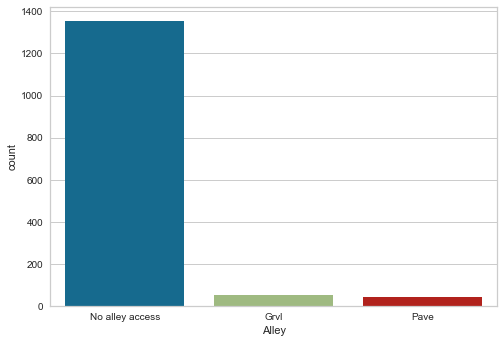

In [125]:
sns.countplot(x="Alley",data=X1)

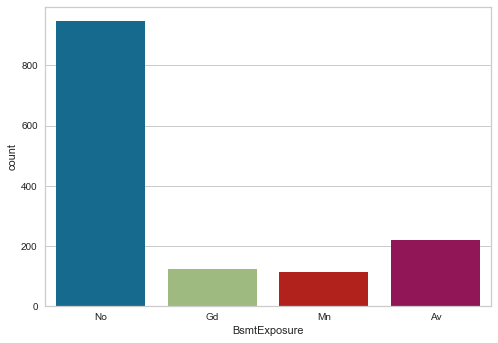

In [126]:
   sns.countplot(x="BsmtExposure",data=X1)  

In [128]:
#BsmtQual         1406 non-null object
#BsmtCond         1406 non-null object
#BsmtExposure     1405 non-null object
#BsmtFinType1     1406 non-null object
#BsmtFinType2     1406 non-null object
X1['BsmtQual'].fillna("No basement", inplace=True)
X1['BsmtCond'].fillna("No basement", inplace=True)
X1['BsmtExposure'].fillna("No basement", inplace=True)
X1['BsmtFinType1'].fillna("No basement", inplace=True)
X1['BsmtFinType2'].fillna("No basement", inplace=True)

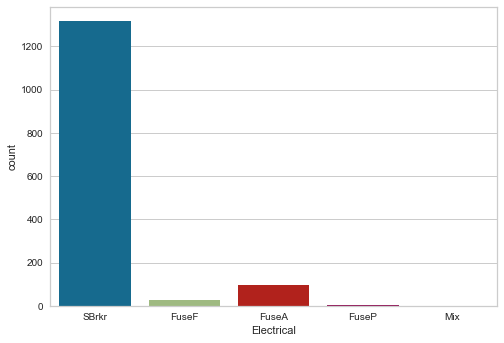

In [129]:
   sns.countplot(x="Electrical",data=X1) 

In [131]:
X1['Electrical'].fillna("SBrkr", inplace=True)

In [132]:
 X1['FireplaceQu'].fillna("No Fireplace", inplace=True)

In [133]:
#GarageType       1362 non-null object
#GarageFinish     1362 non-null object
#GarageQual       1362 non-null object
#GarageCond       1362 non-null object
X1['GarageType'].fillna("No Garage", inplace=True)
X1['GarageFinish'].fillna("No Garage", inplace=True)
X1['GarageQual'].fillna("No Garage", inplace=True)
X1['GarageCond'].fillna("No Garage", inplace=True)

In [134]:
#PoolQC           5 non-null object
#Fence            279 non-null object
#MiscFeature      49 non-null object
X1['PoolQC'].fillna("No Pool", inplace=True)
X1['Fence'].fillna("No Fence", inplace=True)
X1['MiscFeature'].fillna("None", inplace=True)

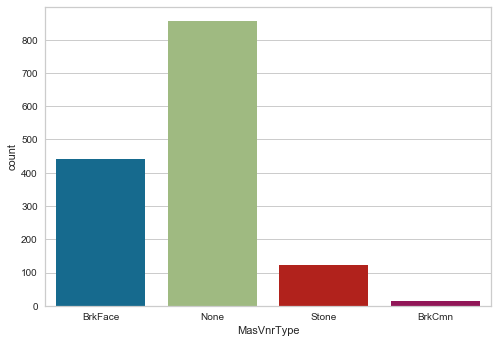

In [135]:
sns.countplot(X1['MasVnrType'])

In [136]:
X1['MasVnrType'].fillna("None", inplace=True)

In [137]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 47 columns):
index            1443 non-null int64
MSSubClass       1443 non-null int64
MSZoning         1443 non-null object
Street           1443 non-null object
Alley            1443 non-null object
LotShape         1443 non-null object
LandContour      1443 non-null object
Utilities        1443 non-null object
LotConfig        1443 non-null object
LandSlope        1443 non-null object
Neighborhood     1443 non-null object
Condition1       1443 non-null object
Condition2       1443 non-null object
BldgType         1443 non-null object
HouseStyle       1443 non-null object
OverallQual      1443 non-null int64
OverallCond      1443 non-null int64
RoofStyle        1443 non-null object
RoofMatl         1443 non-null object
Exterior1st      1443 non-null object
Exterior2nd      1443 non-null object
MasVnrType       1443 non-null object
ExterQual        1443 non-null object
ExterCond        1443 n

In [138]:
X2=X1[['MSSubClass','MSZoning','Street','LotShape',
                      'LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                      'Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                      'OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                      'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
                      'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                      'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                      'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                      'SaleType','SaleCondition']]

In [139]:
# split into train and test sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X2, Y1, test_size=0.1, random_state=1)

In [140]:
X_train1 = X_train1.astype(str)

In [141]:
#xx = X_train1.to_numpy()

In [142]:
#xx

In [143]:
# prepare input data
def prepare_inputs(X_train1, X_test1):
	oe = OrdinalEncoder()
	oe.fit(X_train1)
	X_train1 = X_train1.astype(str)
	X_test1 = X_test1.astype(str)
	X_train_enc = oe.transform(X_train1.values)
	X_test_enc = oe.transform(X_test1.values)
	return X_train_enc, X_test_enc

In [144]:
# prepare target
def prepare_targets(Y_train1, Y_test1):
	le = LabelEncoder()
	le.fit(Y_train1)
	y_train_enc = le.transform(Y_train1)
	y_test_enc = le.transform(Y_test1)
	return y_train_enc, y_test_enc

In [145]:
# feature selection
def select_features(X_train1, Y_train1, X_test1):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train1, Y_train1)
	X_train_fs = fs.transform(X_train1)
	X_test_fs = fs.transform(X_test1)
	return X_train_fs, X_test_fs, fs

In [146]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train1, X_test1)

In [147]:
# prepare output data
#y_train_enc, y_test_enc = prepare_targets(Y_train1, Y_test1)

In [148]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, Y_train1, X_test_enc)

ValueError: Multioutput target data is not supported with label binarization